<h1> Week 7 Homework

<h2>Question 10.1</h2>

Using the same crime data set uscrime.txt as in Questions 8.2 and 9.1, find the best model you can using: <br>
(a) a regression tree model, and <br>
(b) a random forest model. <br>
In R, you can use the tree package or the rpart package, and the randomForest package. <br>
For each model, describe one or two qualitative takeaways you get from analyzing the results (i.e., don’t just stop when you have a good model, but interpret it too). 

In [1]:
# loading the dataset
# READ DATASET as DataFrame
df <- read.table("uscrime.txt", header = TRUE, sep = "\t")
# Display Data
head(df)
cat("No. of cols:", ncol(df), "\n")
cat("No. of rows:", nrow(df))

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
2,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
3,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
4,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
5,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
6,12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


No. of cols: 16 
No. of rows: 47

<p><p style="page-break-after:always;"></p></p>

<b> Regression tree model </b>

In [2]:
# install.packages("tree")
library(tree)

Warning message:
"package 'tree' was built under R version 3.6.3"

In [3]:
tree_model <- tree(Crime~., data=df, model=TRUE)
summary(tree_model)


Regression tree:
tree(formula = Crime ~ ., data = df, model = TRUE)
Variables actually used in tree construction:
[1] "Po1" "Pop" "LF"  "NW" 
Number of terminal nodes:  7 
Residual mean deviance:  47390 = 1896000 / 40 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-573.900  -98.300   -1.545    0.000  110.600  490.100 

In [4]:
# review Leaves data
tree_model$frame

,var,n,dev,yval,splits
,<fct>,<dbl>,<dbl>,<dbl>,"<chr[,2]>"
1,Po1,47,6880927.66,905.0851,"<7.65 , >7.65"
2,Pop,23,779243.48,669.6087,"<22.5 , >22.5"
4,LF,12,243811.00,550.5000,"<0.5675, >0.5675"
8,<leaf>,7,48518.86,466.8571,","
9,<leaf>,5,77757.20,667.6000,","
5,<leaf>,11,179470.73,799.5455,","
3,NW,24,3604162.50,1130.7500,"<7.65 , >7.65"
6,Pop,10,557574.90,886.9000,"<21.5 , >21.5"
12,<leaf>,5,146390.80,1049.2000,","


From the Data above, the minimum number of data points per leaf (\<leaf\> in Var column) is 5 points (n==5).  <br>
Assuming the rule of thumb: minimum number of data points per leaf >= 5% data points (3 points). <br>
Conclusion: The minimum number of data points per leaf is greater than the allowed minimum.

<p><p style="page-break-after:always;"></p></p>

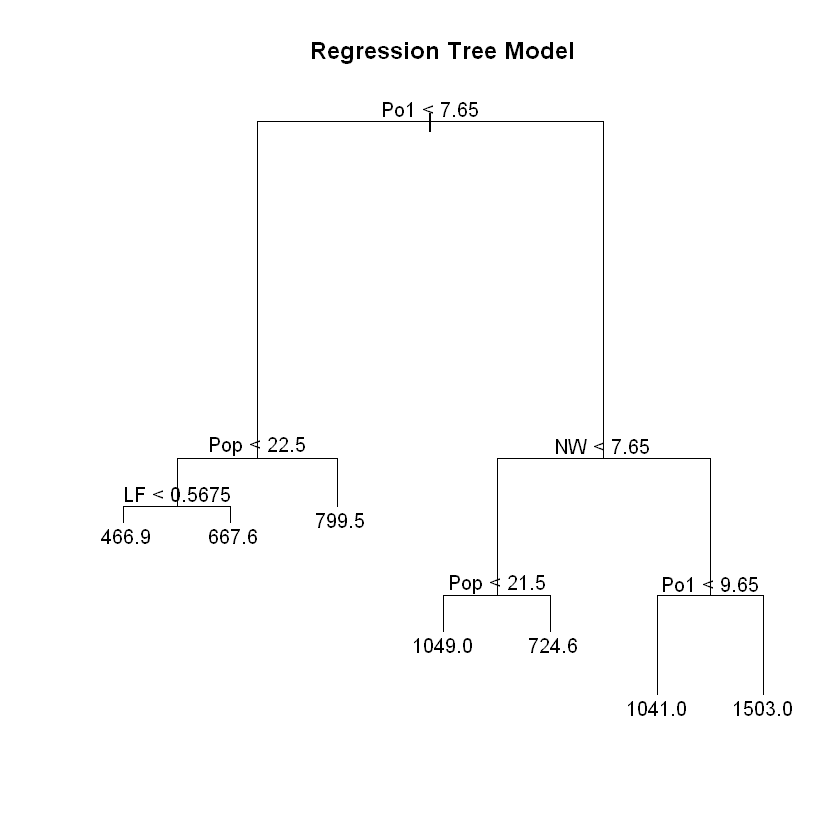

In [5]:
plot(tree_model)
text(tree_model)
title("Regression Tree Model")

We can see that the basic tree model has 7 terminal nodes (leaves). Each terminal node shows the predicted Crime rate/ 100,000 population in that node. <br>
Variables used in tree construction: Po1, POP, LF, NW <br>
<b> Note </b> that instead of having a model for each leaf, the model uses average of points in each leaf to predict leaf value directly

<p><p style="page-break-after:always;"></p></p>

<b> Cross Validating and testing pruning the tree. </b>

In [6]:
set.seed(10)
# testing pruning the tree
pruned_trees_dev <- prune.tree(tree_model)$dev
# 5 fold cross validating for each of the pruned trees
CV_pruned_trees_dev <- cv.tree(tree_model, K=5)$dev
# storing size of the trees
size_trees <- prune.tree(tree_model)$size

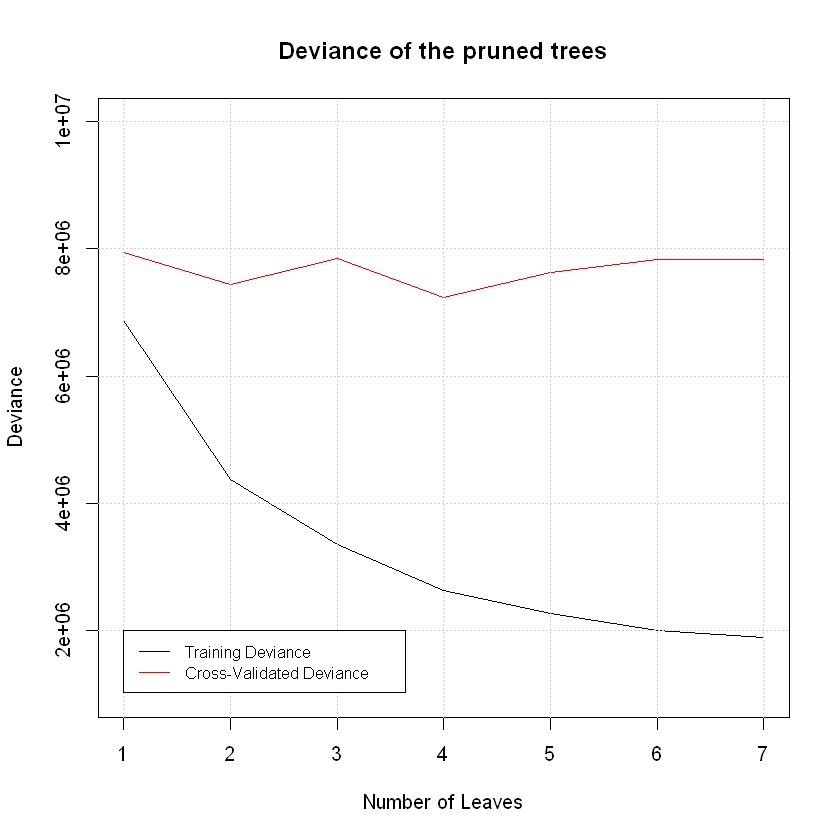

In [7]:
plot(size_trees, pruned_trees_dev, ylim=c(1e6,10e6), type="l", col="black", xlab="Number of Leaves", ylab="Deviance")
lines(size_trees, CV_pruned_trees_dev, col="red")
grid()
title("Deviance of the pruned trees")
legend(1, 2e6, legend=c("Training Deviance", "Cross-Validated Deviance"), col=c("black", "red"), lty=1:1, cex=0.8)

<p><p style="page-break-after:always;"></p></p>

Judging by the deviance plot above, although training Deviance decreases with increasing Number of leafs, 5 Fold cross-validation indicates no imporvement with increasing number of leafs almost constant Deviance. <br>
This indicates significant over-fitting by the model.

<b>Note</b>: Deviance of a model can be computed as the node residual sums of squares, summed over all nodes. In other words, the sum of squared differences between predicted and observed values. The higher the deviance, the worse the model is.

Refrence:
https://stats.stackexchange.com/questions/6581/what-is-deviance-specifically-in-cart-rpart

<p><p style="page-break-after:always;"></p></p>

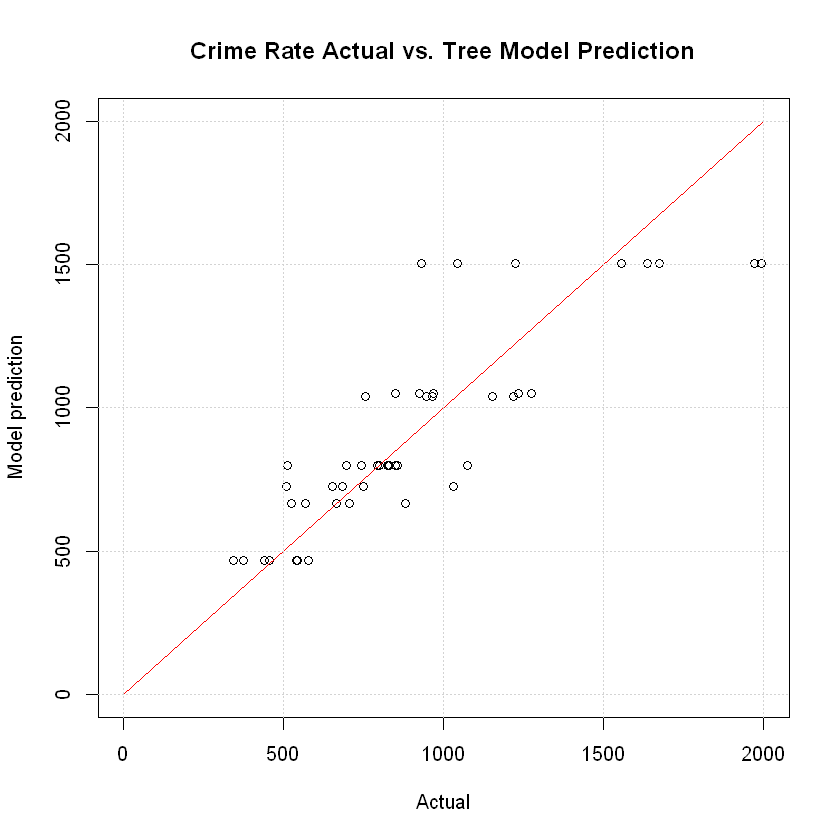

In [8]:
# plot results for Visual QAQC
tree_model_results <- predict(tree_model)
plot(df$Crime, tree_model_results, xlim=c(0,2000), ylim=c(0,2000), xlab="Actual", ylab="Model prediction")
lines(c(0,2000), c(0,2000), col="red")
title("Crime Rate Actual vs. Tree Model Prediction")
grid()

In [9]:
# Calculating TRAINING R2 for Tree model
rss <- sum((tree_model_results - df$Crime) ^ 2)  ## residual sum of squares
tss <- sum((df$Crime - mean(df$Crime)) ^ 2)  ## total sum of squares
r2 <- 1 - rss/tss
cat("Training R2 for Tree Model:", round(r2, 3))

Training R2 for Tree Model: 0.724

Note that significant over-fitting is expected from the Deviance analysis Cross-validation

<p><p style="page-break-after:always;"></p></p>

<b> Random forest model </b>

In [10]:
# install.packages("randomForest")
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


<b> Assumptions </b>
1. Minimum size of terminal node (nodesize= 5% data points i.e. 3 points)
2. Number of variables randomly sampled as candidates at each split (mtry= 1+log(m) i.e. 3 Variables)

In [11]:
# Build the Model
set.seed(0)
randomforest_model <- randomForest(Crime~., data=df, importance = TRUE, nodesize=3, mtry=3)
randomforest_model


Call:
 randomForest(formula = Crime ~ ., data = df, importance = TRUE,      nodesize = 3, mtry = 3) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 82738.35
                    % Var explained: 43.49

<p><p style="page-break-after:always;"></p></p>

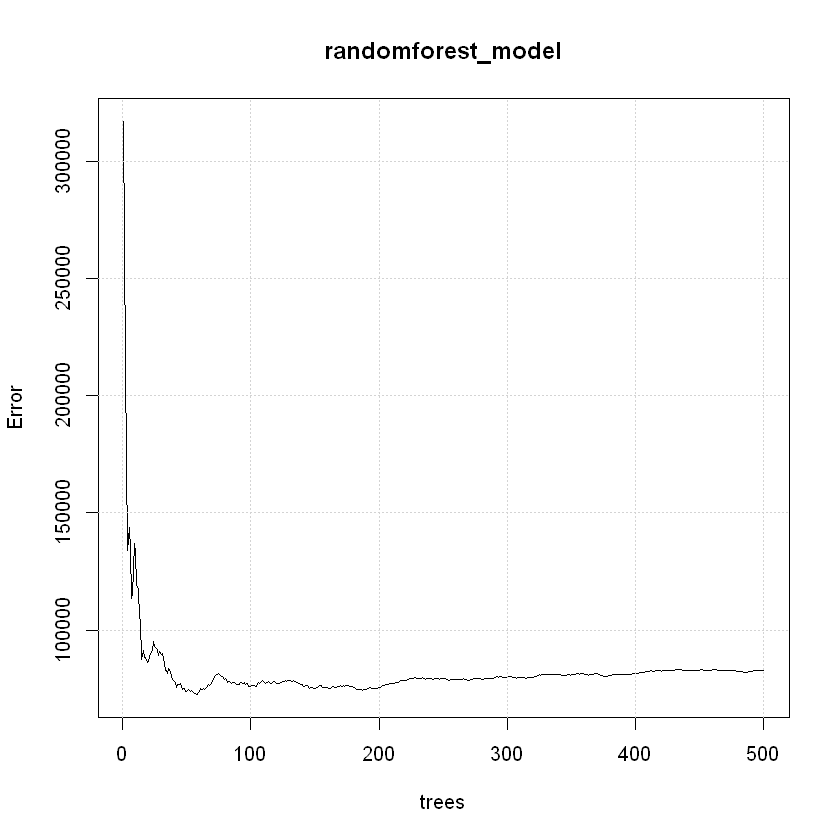

In [12]:
# plot Random Forest results
plot(randomforest_model)
grid()

From the chart, it is clear that when using 50 trees or more, the Mean of squared residuals (Error) roughly stabilizes. 

<p><p style="page-break-after:always;"></p></p>

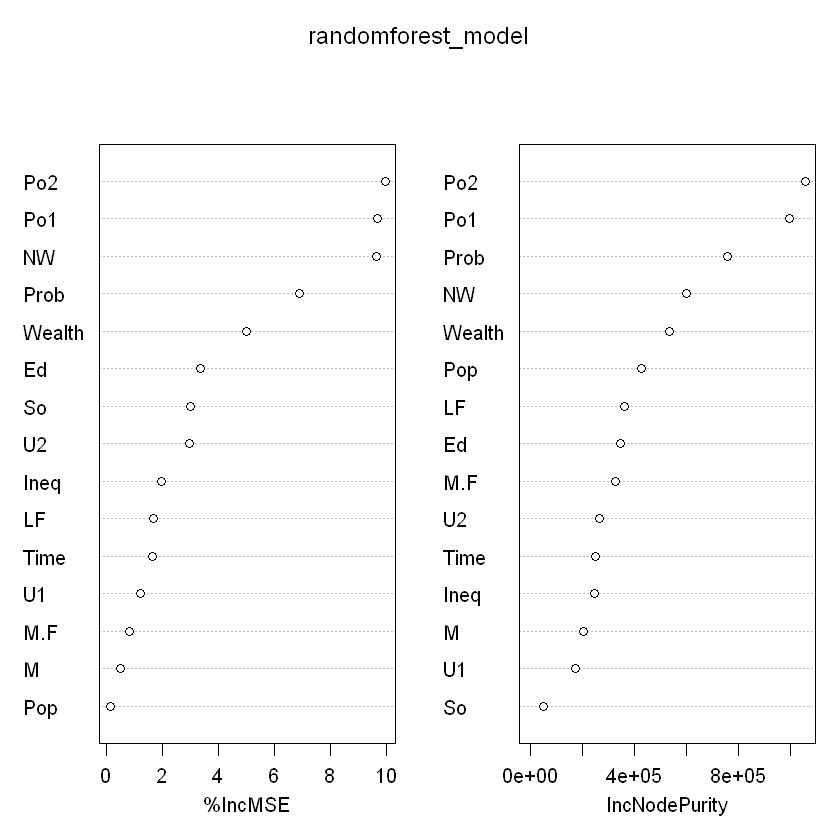

In [13]:
# Plot parameters importance
varImpPlot(randomforest_model, sort=TRUE)

The most important parameters for the random forest model are Po1/Po2, followed by NW, Prob and Wealth.

<p><p style="page-break-after:always;"></p></p>

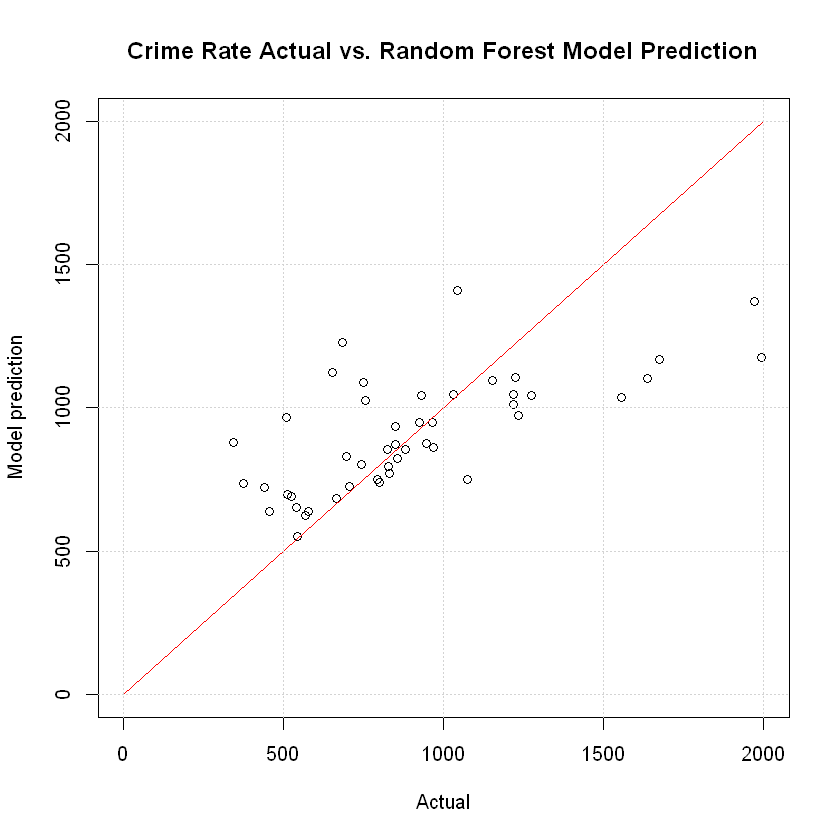

In [14]:
# plot results for visual QAQC
randomforest_results <- predict(randomforest_model)
plot(df$Crime, randomforest_results, xlim=c(0,2000), ylim=c(0,2000), xlab="Actual", ylab="Model prediction")
lines(c(0,2000), c(0,2000), col="red")
title("Crime Rate Actual vs. Random Forest Model Prediction")
grid()

In [15]:
# Calculating TRAINING R2 for Tree model
rss <- sum((randomforest_results - df$Crime) ^ 2)  ## residual sum of squares
tss <- sum((df$Crime - mean(df$Crime)) ^ 2)  ## total sum of squares
r2 <- 1 - rss/tss
cat("Training R2 for Random Forest Model:", round(r2, 3))

Training R2 for Random Forest Model: 0.435

The Random forest model R2 on training data (0.435) is lower than the Tree model R2 on training data (0.72). <br>
However, Random forest is less susceptible to over-fitting while analysis of the tree model showed strong evidence of over-fitting when cross-validated.

<p><p style="page-break-after:always;"></p></p>

New City Prediction for quality checking...

In [16]:
# creating required test city data
test_city <- data.frame("M"=14.0, "So"=0, "Ed"=10.0, "Po1"=12.0, "Po2"=15.5, "LF"=0.64, "M.F"=94.0, "Pop"=150, "NW"=1.1,
                       "U1"=0.12, "U2"=3.6, "Wealth"=3200, "Ineq"=20.1, "Prob"=0.04, "Time"=39.0)
test_city

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,0,10,12,15.5,0.64,94,150,1.1,0.12,3.6,3200,20.1,0.04,39


In [17]:
cat("Tree Model Prediction",round(predict(tree_model, test_city),0), "\n")
cat("Random Forest Model Prediction",round(predict(randomforest_model, test_city),0))

Tree Model Prediction 725 
Random Forest Model Prediction 1184

Comparison between Different models results for new city prediction (in Crime/100,000 population):
1. 6 Factor linear regression model: 1,304
2. First 5 Principal Components linear regression model: 1,389
3. Random Forest Model Prediction: 1,184
4. Tree Model Prediction: 725

From the data, its clear that the optimized linear regression model, the model based on the First 5 Principal Components and the random Forest Model has very close prediction results for the test city crime rate.

On the other hand, The tree model prediction is significantly different at 725 Crime/ 100,000 population confirming its possible over-fitting and low prediction capabilities.

<p><p style="page-break-after:always;"></p></p>

<h2>Question 10.2</h2>

Describe a situation or problem from your job, everyday life, current events, etc., for which a logistic regression model would be appropriate. List some (up to 5) predictors that you might use. 

<h2>Answer 10.2</h2>

The early diagnosis and prognosis of cancer can facilitate the subsequent early treatment and clinical management of patients. <br>
Logistic regression can be used to predict the risk of cancer thus flagging high risk persons for further check up. <br>
Examples of predictors:
1. Age
2. Life Habits (e.g. Obesity, smoking etc.)
3. Family medical history (Number of first-degree relatives who have had cancer)
4. Patient medical history (e.g. diabetes, asthma, etc.)


<p><p style="page-break-after:always;"></p></p>

<h2>Question 10.3</h2>

1. Using the GermanCredit data set germancredit.txt from http://archive.ics.uci.edu/ml/machinelearning-databases/statlog/german / (description at http://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29 ), <br>
Use logistic regression to find a good predictive model for whether credit applicants are good credit risks or not. <br> 
Show your model (factors used and their coefficients), the software output, and the quality of fit. <br>
You can use the glm function in R. To get a logistic regression (logit) model on data where the response is either zero or one, use family=binomial(link=”logit”) in your glm function call. 

2. Because the model gives a result between 0 and 1, it requires setting a threshold probability to separate between “good” and “bad” answers. In this data set, they estimate that incorrectly identifying a bad customer as good, is 5 times worse than incorrectly classifying a good customer as bad. Determine a good threshold probability based on your model. 

In [18]:
# loading the dataset
# READ DATASET as DataFrame
german_df <- read.table("german.txt", header = FALSE, sep = " ")
# Display Data
head(german_df)
cat("No. of cols:", ncol(german_df), "\n")
cat("No. of rows:", nrow(german_df))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,...,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<int>
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
6,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


No. of cols: 21 
No. of rows: 1000

<p><p style="page-break-after:always;"></p></p>

Replacing the target Column (V21) with binary (0 and 1) values <br>
Note 1 = Good and 2 = Bad based on Description file

In [19]:
german_df$V21[german_df$V21==1] <- 1 
german_df$V21[german_df$V21==2] <- 0 
head(german_df)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,...,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<dbl>
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0
6,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


Dividing the data into training and validation_datasets 70% training and 30% validation

In [20]:
# install.packages("caret", dependencies=TRUE)
library(caret)
# Fix Seed Number
set.seed(1)
# Find indexes
training_idx <- createDataPartition(german_df$V21, times = 1, p = 0.7, list=FALSE)
train_df <- german_df[training_idx,]
valid_df <- german_df[-training_idx,]

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



<p><p style="page-break-after:always;"></p></p>

In [21]:
"Summary of Database Response values"
table(german_df$V21)
cat("Ratio of 0 to 1 responses:", round(table(german_df$V21)[1]/nrow(german_df),3), "\n")

[1] "Summary of Database Response values"


  0   1 
300 700 

Ratio of 0 to 1 responses: 0.3 


In [22]:
"Summary of Training Response values"
table(train_df$V21)
cat("Ratio of 0 to 1 responses:", round(table(train_df$V21)[1]/nrow(train_df),3), "\n")

[1] "Summary of Training Response values"


  0   1 
208 492 

Ratio of 0 to 1 responses: 0.297 


In [23]:
"Summary of Validation Response values"
table(valid_df$V21)
cat("Ratio of 0 to 1 responses:", round(table(valid_df$V21)[1]/nrow(valid_df),3), "\n")

[1] "Summary of Validation Response values"


  0   1 
 92 208 

Ratio of 0 to 1 responses: 0.307 


From the data, The original dataframe and the subsets (training and Validation) has the same non-creditable ratio 30% (response=0)

<p><p style="page-break-after:always;"></p></p>

<b> Building the basic logistic Model using all input variables </b>

In [24]:
# building the intial model
set.seed(0)
base_logit_model <- glm(V21 ~ ., data = train_df, family=binomial(link="logit"))
summary(base_logit_model)


Call:
glm(formula = V21 ~ ., family = binomial(link = "logit"), data = train_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4540  -0.6750   0.3608   0.6861   2.4438  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.823e-01  1.332e+00  -0.287 0.774162    
V1A12        5.201e-01  2.681e-01   1.940 0.052408 .  
V1A13        1.150e+00  4.473e-01   2.570 0.010173 *  
V1A14        1.675e+00  2.750e-01   6.091 1.12e-09 ***
V2          -2.570e-02  1.159e-02  -2.217 0.026647 *  
V3A31       -8.440e-02  6.580e-01  -0.128 0.897943    
V3A32        8.078e-01  4.996e-01   1.617 0.105907    
V3A33        7.683e-01  5.372e-01   1.430 0.152634    
V3A34        1.446e+00  5.127e-01   2.821 0.004784 ** 
V4A41        1.513e+00  4.479e-01   3.379 0.000728 ***
V4A410       2.412e+00  1.160e+00   2.080 0.037543 *  
V4A42        5.496e-01  3.195e-01   1.720 0.085354 .  
V4A43        9.142e-01  3.024e-01   3.023 0.002503 ** 
V4A44        4.163e

Convert Factorial columns into Binary columns e.g. Column V1 Factor A13 into V1A13 Column with binary inputs (0,1)

In [25]:
# copy initial Dataframe
train_df_edit <- train_df
# Convert Factorial columns into Binary columns e.g. Column V1 Factor A13 into V1A13 Column with binary inputs (0,1)
train_df_edit$V1A12 <- ifelse(train_df_edit$V1 == "A12", 1, 0)
train_df_edit$V1A13 <- ifelse(train_df_edit$V1 == "A13", 1, 0)
train_df_edit$V1A14 <- ifelse(train_df_edit$V1 == "A14", 1, 0)
train_df_edit$V3A34 <- ifelse(train_df_edit$V3 == "A34", 1, 0)
train_df_edit$V4A41 <- ifelse(train_df_edit$V4 == "A41", 1, 0)
train_df_edit$V4A410 <- ifelse(train_df_edit$V4 == "A410", 1, 0)
train_df_edit$V4A42 <- ifelse(train_df_edit$V4 == "A42", 1, 0)
train_df_edit$V4A43 <- ifelse(train_df_edit$V4 == "A43", 1, 0)
train_df_edit$V6A64 <- ifelse(train_df_edit$V6 == "A64", 1, 0)
train_df_edit$V6A65 <- ifelse(train_df_edit$V6 == "A65", 1, 0)
train_df_edit$V7A74 <- ifelse(train_df_edit$V7 == "A74", 1, 0)
train_df_edit$V12A124 <- ifelse(train_df_edit$V12 == "A124", 1, 0)
train_df_edit$V14A143 <- ifelse(train_df_edit$V14 == "A143", 1, 0)
train_df_edit$V15A152 <- ifelse(train_df_edit$V15 == "A152", 1, 0)
train_df_edit$V17A172 <- ifelse(train_df_edit$V17 == "A172", 1, 0)
train_df_edit$V17A173 <- ifelse(train_df_edit$V17 == "A173", 1, 0)
train_df_edit$V20A202 <- ifelse(train_df_edit$V20 == "A202", 1, 0)
head(train_df_edit)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V4A43,V6A64,V6A65,V7A74,V12A124,V14A143,V15A152,V17A172,V17A173,V20A202
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,1,0,1,0,0,1,1,0,1,0
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,0,0,0,1,0,1,1,1,0,0
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,0,0,0,1,0,1,0,0,1,0
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,0,0,0,0,1,1,0,0,1,0
6,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,0,0,1,0,1,1,0,1,0,0
7,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,0,0,0,0,0,1,1,0,1,0


<p><p style="page-break-after:always;"></p></p>

Optimized models will be created based on using the p-values of each Coefficient, where p-value <=0.10 <br>
<b> 1st Optimized Model </b>

In [26]:
# building the optimized model
set.seed(0)
opt_logit_model_1 <- glm(V21~V1A12+V1A13+V1A14+V2+
                       V3A34+V4A41+V4A410+V4A42+V4A43+
                       V5+V6A64+V6A65+V7A74+V8+
                       V12A124+V13+V14A143+V15A152+V20A202,
                       data = train_df_edit, family=binomial(link="logit"))
summary(opt_logit_model_1)


Call:
glm(formula = V21 ~ V1A12 + V1A13 + V1A14 + V2 + V3A34 + V4A41 + 
    V4A410 + V4A42 + V4A43 + V5 + V6A64 + V6A65 + V7A74 + V8 + 
    V12A124 + V13 + V14A143 + V15A152 + V20A202, family = binomial(link = "logit"), 
    data = train_df_edit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6489  -0.8057   0.3919   0.7396   2.0341  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.534e-01  5.669e-01  -1.682 0.092640 .  
V1A12        5.588e-01  2.439e-01   2.291 0.021937 *  
V1A13        1.118e+00  4.163e-01   2.686 0.007236 ** 
V1A14        1.764e+00  2.588e-01   6.816 9.37e-12 ***
V2          -2.322e-02  1.069e-02  -2.172 0.029845 *  
V3A34        6.137e-01  2.448e-01   2.507 0.012189 *  
V4A41        1.436e+00  4.063e-01   3.535 0.000408 ***
V4A410       2.329e+00  9.793e-01   2.378 0.017404 *  
V4A42        2.566e-01  2.677e-01   0.958 0.337867    
V4A43        7.834e-01  2.478e-01   3.162 0.001568 ** 
V5          -1.159

<p><p style="page-break-after:always;"></p></p>

Using the p-values of each Coefficient, a second optimized model will be created where p-value <=0.10 <br>
<b> 2nd Optimized Model </b>

In [27]:
# building the 2nd optimized model
opt_logit_model_2 <- glm(V21~V1A12+V1A13+V1A14+V2+
                       V3A34+V4A41+V4A410+V4A43+
                       V5+V6A64+V6A65+V7A74+V8+
                       V13+V14A143+V15A152+V20A202,
                       data = train_df_edit, family=binomial(link="logit"))
summary(opt_logit_model_2)


Call:
glm(formula = V21 ~ V1A12 + V1A13 + V1A14 + V2 + V3A34 + V4A41 + 
    V4A410 + V4A43 + V5 + V6A64 + V6A65 + V7A74 + V8 + V13 + 
    V14A143 + V15A152 + V20A202, family = binomial(link = "logit"), 
    data = train_df_edit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6374  -0.8241   0.3956   0.7478   1.9601  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.769e-01  5.430e-01  -1.431 0.152522    
V1A12        5.121e-01  2.404e-01   2.130 0.033165 *  
V1A13        1.079e+00  4.145e-01   2.604 0.009213 ** 
V1A14        1.741e+00  2.572e-01   6.770 1.28e-11 ***
V2          -2.478e-02  1.056e-02  -2.347 0.018927 *  
V3A34        6.001e-01  2.432e-01   2.467 0.013612 *  
V4A41        1.349e+00  3.947e-01   3.418 0.000632 ***
V4A410       2.217e+00  9.795e-01   2.264 0.023603 *  
V4A43        7.163e-01  2.337e-01   3.065 0.002173 ** 
V5          -1.212e-04  4.911e-05  -2.467 0.013616 *  
V6A64        1.164e+00  6.043e-01   

<p><p style="page-break-after:always;"></p></p>

<b> Selecting the Optimal Model </b>

In [28]:
delta_AIC <- opt_logit_model_1$aic - opt_logit_model_2$aic
cat("The Delta AIC between the 2 optimized models is", delta_AIC)

The Delta AIC between the 2 optimized models is 1.380515

Following the rule of thumb, since Δ AIC < 2, there is substantial support for the 1st optimized model. (i.e. the extra dimension reduction of the second optimized model is not supported)

In [29]:
delta_AIC <- base_logit_model$aic - opt_logit_model_1$aic
cat("The Delta AIC between the 2 models is", delta_AIC)

The Delta AIC between the 2 models is 25.61516

Following the rule of thumb since Δ AIC >10, The 1st optimized model is significantly better than the base model with all the variables.

Reference: <br>
https://stats.stackexchange.com/questions/232465/how-to-compare-models-on-the-basis-of-aic

Evaluating the selected model using Confusion Matrix and Model Accuracy on Training Data

In [30]:
train_predict <- predict(opt_logit_model_1, newdata=train_df_edit, type="response")
confusionMatrix(as.factor(train_df_edit$V21), as.factor(round(train_predict)))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 108 100
         1  49 443
                                          
               Accuracy : 0.7871          
                 95% CI : (0.7549, 0.8169)
    No Information Rate : 0.7757          
    P-Value [Acc > NIR] : 0.2498          
                                          
                  Kappa : 0.4516          
                                          
 Mcnemar's Test P-Value : 4.201e-05       
                                          
            Sensitivity : 0.6879          
            Specificity : 0.8158          
         Pos Pred Value : 0.5192          
         Neg Pred Value : 0.9004          
             Prevalence : 0.2243          
         Detection Rate : 0.1543          
   Detection Prevalence : 0.2971          
      Balanced Accuracy : 0.7519          
                                          
       'Positive' Class : 0               
                              

<p><p style="page-break-after:always;"></p></p>

Evaluating the selected model using Confusion Matrix and Model Accuracy on Validation Data

In [31]:
# copy initial Dataframe
valid_df_edit <- valid_df
# Convert Factorial columns into Binary columns e.g. Column V1 Factor A13 into V1A13 Column with binary inputs (0,1)
valid_df_edit$V1A12 <- ifelse(valid_df_edit$V1 == "A12", 1, 0)
valid_df_edit$V1A13 <- ifelse(valid_df_edit$V1 == "A13", 1, 0)
valid_df_edit$V1A14 <- ifelse(valid_df_edit$V1 == "A14", 1, 0)
valid_df_edit$V3A34 <- ifelse(valid_df_edit$V3 == "A34", 1, 0)
valid_df_edit$V4A41 <- ifelse(valid_df_edit$V4 == "A41", 1, 0)
valid_df_edit$V4A410 <- ifelse(valid_df_edit$V4 == "A410", 1, 0)
valid_df_edit$V4A42 <- ifelse(valid_df_edit$V4 == "A42", 1, 0)
valid_df_edit$V4A43 <- ifelse(valid_df_edit$V4 == "A43", 1, 0)
valid_df_edit$V6A64 <- ifelse(valid_df_edit$V6 == "A64", 1, 0)
valid_df_edit$V6A65 <- ifelse(valid_df_edit$V6 == "A65", 1, 0)
valid_df_edit$V7A74 <- ifelse(valid_df_edit$V7 == "A74", 1, 0)
valid_df_edit$V12A124 <- ifelse(valid_df_edit$V12 == "A124", 1, 0)
valid_df_edit$V14A143 <- ifelse(valid_df_edit$V14 == "A143", 1, 0)
valid_df_edit$V15A152 <- ifelse(valid_df_edit$V15 == "A152", 1, 0)
valid_df_edit$V17A172 <- ifelse(valid_df_edit$V17 == "A172", 1, 0)
valid_df_edit$V17A173 <- ifelse(valid_df_edit$V17 == "A173", 1, 0)
valid_df_edit$V20A202 <- ifelse(valid_df_edit$V20 == "A202", 1, 0)
head(valid_df_edit)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V4A43,V6A64,V6A65,V7A74,V12A124,V14A143,V15A152,V17A172,V17A173,V20A202
,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,1,0,0,0,0,1,1,0,1,0
10,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,0,0,0,0,0,1,1,0,0,0
14,A11,24,A34,A40,1199,A61,A75,4,A93,A101,...,0,0,0,0,0,1,1,1,0,0
18,A11,30,A30,A49,8072,A65,A72,2,A93,A101,...,0,0,1,0,0,0,1,0,1,0
21,A14,9,A34,A40,2134,A61,A73,4,A93,A101,...,0,0,0,0,0,1,1,0,1,0
23,A11,10,A34,A40,2241,A61,A72,1,A93,A101,...,0,0,0,0,0,1,0,1,0,1


<p><p style="page-break-after:always;"></p></p>

In [32]:
valid_predict <- predict(opt_logit_model_1, newdata=valid_df_edit, type="response")
confusionMatrix(as.factor(valid_df_edit$V21), as.factor(round(valid_predict)))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  44  48
         1  35 173
                                         
               Accuracy : 0.7233         
                 95% CI : (0.669, 0.7732)
    No Information Rate : 0.7367         
    P-Value [Acc > NIR] : 0.7246         
                                         
                  Kappa : 0.3227         
                                         
 Mcnemar's Test P-Value : 0.1878         
                                         
            Sensitivity : 0.5570         
            Specificity : 0.7828         
         Pos Pred Value : 0.4783         
         Neg Pred Value : 0.8317         
             Prevalence : 0.2633         
         Detection Rate : 0.1467         
   Detection Prevalence : 0.3067         
      Balanced Accuracy : 0.6699         
                                         
       'Positive' Class : 0              
                                         

From the data above, 
1. The model Accuracy on the Validation set is slightly lower than the training set (indicating some overfitting) however overall it is still acceptable (72%)
2. The model still suffers from high confusion in class 0 (50% of the points are mis-classified)

<p><p style="page-break-after:always;"></p></p>

<b>Finding Optimal Threshold</b>

Assuming that incorrectly identifying a bad customer as good, is 5 times worse than incorrectly classifying a good customer as bad, A sensitivity run was made to find the optimal threshold.

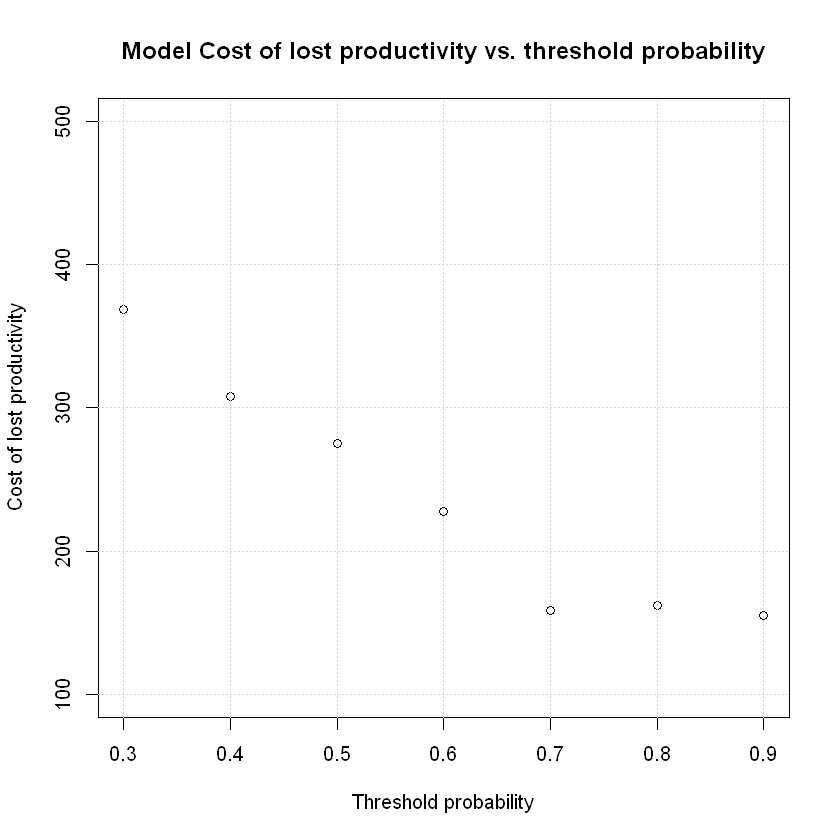

In [33]:
cost_list <- seq(1,7)
threshold_list <- seq(3,9)/10
for (i in seq(1,7)){
    result_matrix <- table(valid_df_edit$V21, as.numeric(valid_predict>threshold_list[i]))
    model_cost <- result_matrix[1,1]*0 + result_matrix[1,2]*5 + result_matrix[2,1]*1 + result_matrix[2,2]*0
    cost_list[i] <- model_cost
}
plot(threshold_list, cost_list, ylim=c(100,500), xlab="Threshold probability", ylab="Cost of lost productivity")
title("Model Cost of lost productivity vs. threshold probability")
grid()

<p><p style="page-break-after:always;"></p></p>

In [34]:
# Final Model Confusion Matrix on Validation data
confusionMatrix(as.factor(valid_df_edit$V21), as.factor(round(valid_predict>=0.7)))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  73  19
         1  64 144
                                         
               Accuracy : 0.7233         
                 95% CI : (0.669, 0.7732)
    No Information Rate : 0.5433         
    P-Value [Acc > NIR] : 1.164e-10      
                                         
                  Kappa : 0.4275         
                                         
 Mcnemar's Test P-Value : 1.368e-06      
                                         
            Sensitivity : 0.5328         
            Specificity : 0.8834         
         Pos Pred Value : 0.7935         
         Neg Pred Value : 0.6923         
             Prevalence : 0.4567         
         Detection Rate : 0.2433         
   Detection Prevalence : 0.3067         
      Balanced Accuracy : 0.7081         
                                         
       'Positive' Class : 0              
                                         

Conclusion: <br>
Based on the sensitivity analysis, a threshold of 0.7 should be used (when incorrectly identifying a bad customer as good, is 5 times worse than incorrectly classifying a good customer)